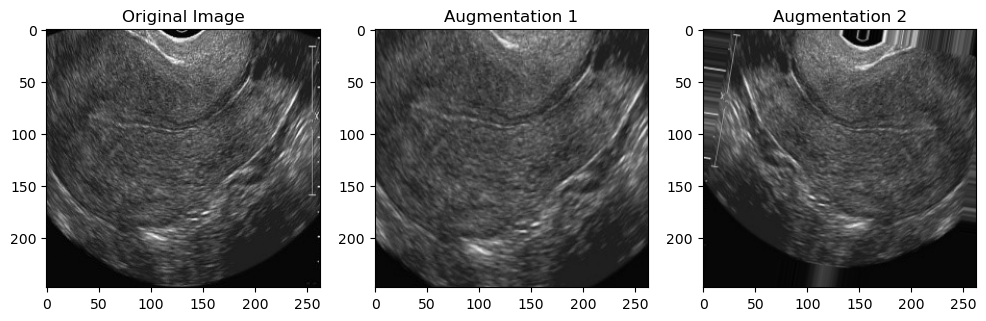

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# Set the seed for reproducibility
tf.random.set_seed(42)

# Define the path to your dataset
data_path = r"D:\PCOS_Challenge\New folder\train\healthy"

# Create an ImageDataGenerator instance with various augmentation techniques
datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
    #fill_mode='nearest')

# Choose an image from your dataset for demonstration
img_path = r"D:\PCOS_Challenge\New folder\train\healthy\image2805.jpg"
img = Image.open(img_path)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch of size 1

# Generate augmented images
augmentations = 2  # Number of augmented images to generate
fig, ax = plt.subplots(1, augmentations + 1, figsize=(12, 4))

# Original Image
ax[0].imshow(tf.squeeze(img_array)/255.0)
ax[0].set_title('Original Image')

# Generate and plot augmented images
for i in range(1, augmentations + 1):
    augmented_img = datagen.flow(img_array).next()
    #ax[i].imshow(tf.squeeze(augmented_img)/255.0)
    ax[i].imshow(tf.squeeze(augmented_img).numpy().astype(np.uint8))
    ax[i].set_title(f'Augmentation {i}')
#plt.savefig(r'D:\PCOS_Challenge\MIA_Project\augmented_image_data.jpg')
plt.show()

In [2]:
try:
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import matplotlib.pyplot as plt
    import os
    from tqdm import tqdm
    from PIL import Image
except ImportError:
    # Install required libraries if not found
    !pip install tensorflow pillow

# Set the seed for reproducibility
tf.random.set_seed(42)

# Define the path to your dataset
original_data_path = r"D:\PCOS_Challenge\New folder\valid\healthy"

# Define the path to save the augmented dataset
augmented_data_path = r"D:\PCOS_Challenge\New folder\valid\aug_healthy"
os.makedirs(augmented_data_path, exist_ok=True)

# Create an ImageDataGenerator instance with various augmentation techniques
datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
    #fill_mode='nearest')

#fig, ax = plt.subplots(1, 2 + 1, figsize=(12, 2))


# Iterate through each image in the class
for img_name in tqdm(os.listdir(original_data_path)):
    img_path = os.path.join(original_data_path, img_name)
    #print(img_path)
    img = Image.open(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch of size 1
    # Original Image
    #ax[0].imshow(tf.squeeze(img_array)/255.0)
    #ax[0].set_title('Original Image')

    # Generate augmented images and save them
    for i in range(1, 2 + 1):
        augmented_img = datagen.flow(img_array).next()
        augmented_img_name = f"{img_name}_aug_{i}.png"
        augmented_img_path = os.path.join(augmented_data_path, augmented_img_name)
        #ax[i].imshow(tf.squeeze(augmented_img).numpy().astype(np.uint8))
        #ax[i].set_title(f'Augmentation {i}')
        plt.imsave(augmented_img_path, tf.squeeze(augmented_img).numpy().astype(np.uint8))

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:02<00:00, 39.29it/s]
